Project 3: (10 points)
your total (50 points) will divided by 5 to get 10 points for this project.


In this project, we will focus on the preprocessing step before building the model.

We will prepare data before making a Market basket analysis, which is an algorithm originally designed to help retailers understand and improve their businesses. 

Also, we will do some important preprocessing step before building an unsupervised model for Customer Segments.

### Market Basket Analysis
---
Imagine you work for a retailer that sells dozens of products and your boss comes to you and asks the following questions:

* What products are purchased together most frequently?
* How should the products be organized and positioned in the store?
* How do we identify the best products to discount via coupons?
---
##### You might reasonably respond with complete bewilderment, as those questions are very diverse and do not immediately seem answerable using a single algorithm and dataset. However, the answer to all those questions and many more is market basket analysis. 
--
### Dataset:
you can find the dataset on Canvas under Dataset section: "Online Retail.xlsx"

### Steps to do:

1- Open a Jupyter notebook.

2- Install the following libraries, if not installed, and then import them:
* matplotlib.pyplot, which is used to plot the results of the models.
* mlxtend.frequent_patterns, which is used to run the models; 
* mlxtend.preprocessing, which is used to encode and prep the data for the models;
* numpy, which is used to work with arrays; 
* pandas, which is used to work with DataFrames.

In [1]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [217]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import pandas as pd

3- Loading Data ( 1 point)

Load and view online retail dataset.Once you have downloaded the dataset, save it and note the path.

In [3]:
# write your code here
retail_df=pd.read_excel('Online_Retail.xlsx')


In [4]:
retail_df1=retail_df

4- Print out the first 10 rows of the DataFrame. ( 1 point)

Notice that the data contains some columns that will not be relevant to market basket analysis:

In [5]:
# write your code here
retail_df.head(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


5- Print out the data type for each column in the DataFrame. (1 point)

This information will come in handy when trying to perform specific cleaning tasks. Columns need to be of the correct type in order for filtering and computing to execute as expected:

In [6]:
# write your code here
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


6- Get and print the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications (2 points)

In [7]:
# write your code here

print(retail_df.shape)
num_uniquecustID=retail_df['CustomerID'].nunique()
num_unique_invoice=retail_df['InvoiceNo'].nunique()
print('unique number in customerid=',num_uniquecustID,'\n'+'the unique values in invoice id=',num_unique_invoice)

(541909, 8)
unique number in customerid= 4372 
the unique values in invoice id= 25900


7- Data Cleaning and Formatting:

a. Create an indicator column stipulating whether the invoice number begins with "C". Called the column "IsCPresent" ( 1 points)

In [8]:
# write your code here
indicator=retail_df['InvoiceNo'].str.startswith("C").astype(bool)
retail_df['IsCpresent']=indicator
print(retail_df['IsCpresent'])

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: IsCpresent, Length: 541909, dtype: bool


b. (3 points)
- Filter out all transactions having either zero or a negative number of items (in other words, items were returned), 
- Remove all invoice numbers starting with "C" using the column created in previous step 
- Subset the DataFrame down to InvoiceNo and Description
- Drop all rows with at least one missing value. 
- Rename the DataFrame online1 and print out the first 10 rows of the filtered DataFrame, online1.

In [9]:
# write your code here
retail_df=retail_df[retail_df['Quantity']>0]
print(retail_df.shape)


(531285, 9)


In [10]:
retail_df=retail_df[retail_df['IsCpresent']!='True']
print(retail_df.shape)

(531285, 9)


In [11]:
subset_df=retail_df[['InvoiceNo','Description']]
subset_df.head()

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.


In [12]:
subset_df=subset_df.dropna()
subset_df.shape

(530693, 2)

In [188]:
online1 = subset_df.rename(columns={"subset_df": "online1"})
online1.shape

(530693, 2)

c. Approximately, how many rows and invoice numbers have already removed? ( 2 points)


### Edit to write your answer here

In [189]:
#write your code here to prove your answer:
print(len(retail_df)-len(online1))

592


d. (2 points)
- Extract the invoice numbers from the DataFrame as a list. 
- Remove duplicate elements to create a list of unique invoice numbers. 
- Confirm that the process was successful by printing the length of the list of unique invoice numbers.

In [191]:
# write your code here
retail_list=list(online1['InvoiceNo'].unique())
print(len(retail_list))



20136


e. Take the list from step d and cut it to only include the first 5,000 elements. Print out the length of the new list to confirm that it is, in fact, the expected length of 5,000( 1 point)

In [192]:
# write your code here
retail_list=retail_list[:5000]
print(len(retail_list))

5000


In [193]:
online1=online1.query('InvoiceNo in @retail_list')

In [194]:
print(len(online1))

133315


f. Filter the online1 DataFrame down by only keeping the invoice numbers in the list from step e and print out the first 10 rows of online1( 1 point)

In [195]:
# write your code here
online1=online1[online1['InvoiceNo'].isin(retail_list)]
print(len(online1))



133315


g. Print out the dimensions of the DataFrame (online1) and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful (1 point)

In [196]:
# write your code here
print(online1.shape)
print(online1['InvoiceNo'].nunique())
online_distinct=online1['InvoiceNo'].unique()
print(online_distinct)

(133315, 2)
5000
[536365 536366 536367 ... 547944 547945 547946]


In [198]:
len(online_distinct)

5000

h. Transform the data in online1 into the aforementioned list of lists called invoice_item_list. The process for doing this is to iterate over the unique invoice numbers and, at each iteration, extract the item descriptions as a list and append that list to the larger invoice_item_list list. Print out elements one through four of the list (2 points)

In [237]:
# write your code here
invoice_item_list=[]
for uniq in online_distinct:
    invoice_desc=online1[online1['InvoiceNo'] ==uniq]
    item_descrip=list(invoice_desc['Description'])
    invoice_item_list.append(item_descrip)
print(len(invoice_item_list))
print(invoice_item_list[:4])
    
    
    
    

5000
[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']]


8- Data Encoding

While cleaning the data is crucial, the most important part of the data preparation process is molding the data into the correct form. Before running the models, the data, currently in the list of lists form, needs to be encoded and recast as a DataFrame.

To do this, we will leverage TransactionEncoder from the preprocessing module of mlxtend. The output from the encoder is a multidimensional array, where each row is the length of the total number of unique items in the transaction dataset and the elements are Boolean variables, indicating whether that particular item is linked to the invoice number that row represents. With the data encoded, we can recast it as a DataFrame where the rows are the invoice numbers and the columns are the unique items in the transaction dataset.

The data encoding will be done using mlxtend, but if you wish to encode the data without using a package, you are free.

More info about mlxtend in the link: https://rasbt.github.io/mlxtend/

a. Initialize and fit the transaction encoder. Print out an example of the resulting data. (2 points)

In [265]:
te = TransactionEncoder()
te.fit(invoice_item_list).transform(invoice_item_list)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

b. Recast the encoded array as a DataFrame named online_encoder_df. Print the predefined subset of the DataFrame that features both True and False values (2 points)

In [262]:
# write your code here
invoice_encoder_df = pd.DataFrame(data_trans, columns=te.columns_)

# print the DataFrame
print(invoice_encoder_df.head())

# to check if all descriptions are present.
if 'WHITE HANGING HEART T-LIGHT HOLDER' in invoice_encoder_df.columns:
    print('yes')


    4 PURPLE FLOCK DINNER CANDLES   OVAL WALL MIRROR DIAMANTE   \
0                           False                        False   
1                           False                        False   
2                           False                        False   
3                           False                        False   
4                           False                        False   

    SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   

   *Boombox Ipod Classic  *USB Office Mirror Ball  10 COLOUR SPACEBOY PEN  \
0                  False                    False                   False   
1                  False                    False               

c. Print out the dimensions of the encoded DataFrame. It should have 5,000 rows because the data used to generate it was previously filtered down to 5,000 unique invoice numbers. (1 point)

In [263]:
# write your code here
invoice_encoder_df.shape

(5000, 3135)

#### The data is now prepared for modeling.
---

### Wholesale Data

we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

--
### Dataset:
you can find the dataset on Canvas under Dataset section: "wholesale_customers_data.csv"

In [33]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import uniform, multivariate_normal, rand, randn, seed
from itertools import repeat
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import to_rgba
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import jarque_bera, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

1. Load the wholesale customers dataset (1 point)

In [3]:
# write your code here
wholesale_df=pd.read_csv('wholesale_customers_data.csv')
wholesale_df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


2. Drop Channel & Region and print the current columns ( 1 point)

In [4]:
# write your code here
wholesale_df=wholesale_df.drop(columns=['Channel','Region'])
wholesale_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Data Exploration:

You will begin exploring the data through visualizations and code to understand how each feature is related to the others.



3. Show a statistical summary for each of the above product categories. (1 point)

In [5]:
# write your code here
print(wholesale_df.describe())

               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


4. Show a visual representation of the distribution of each feature in the data.using histogram and normal probability plot. (2 points)

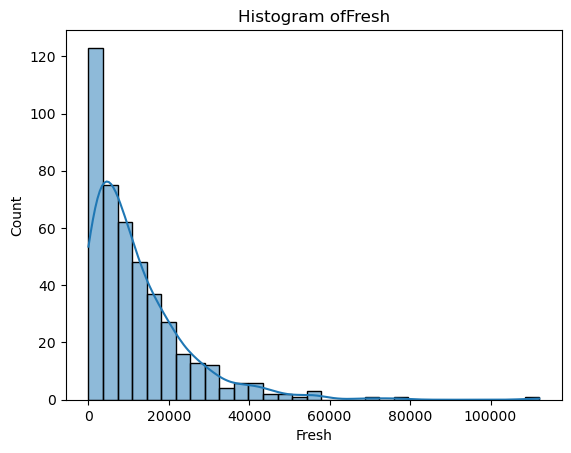

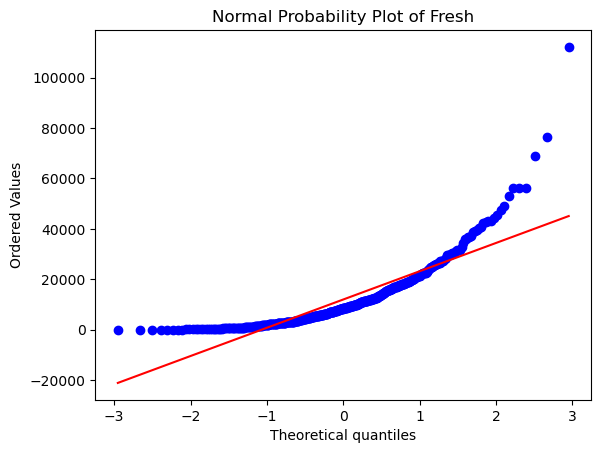

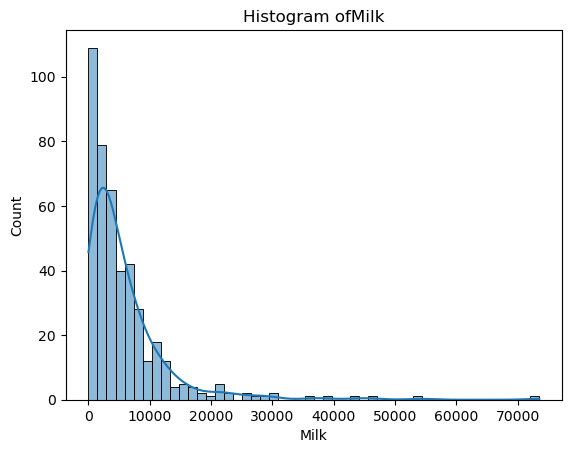

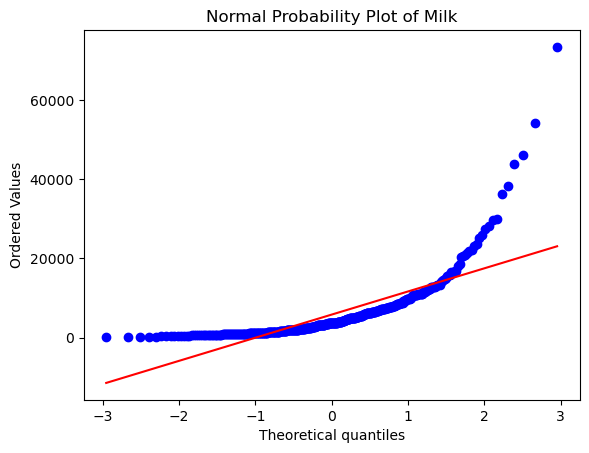

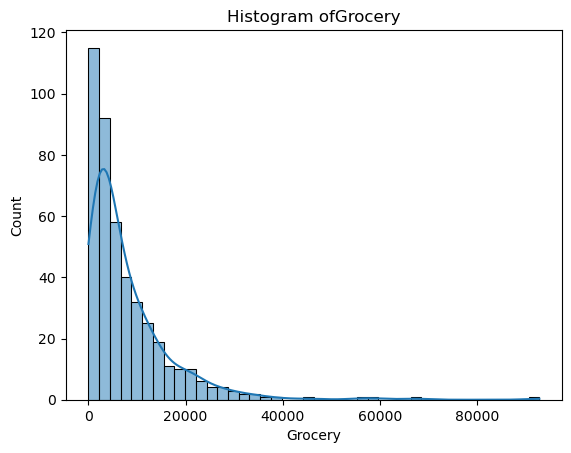

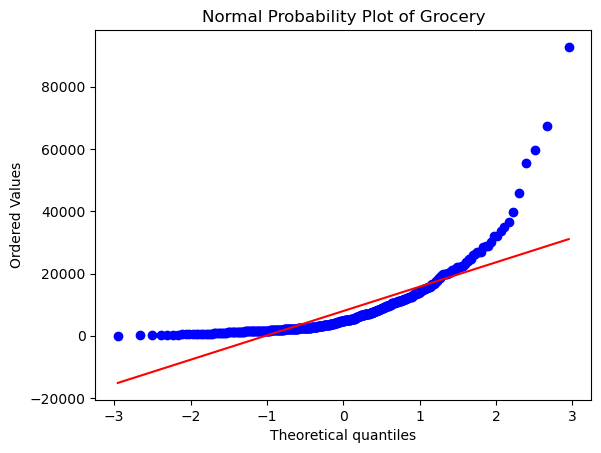

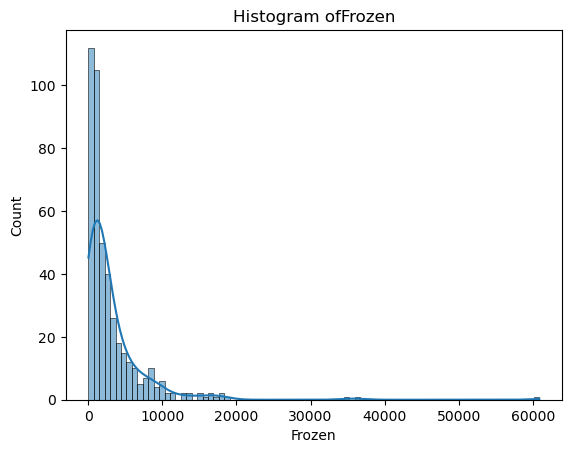

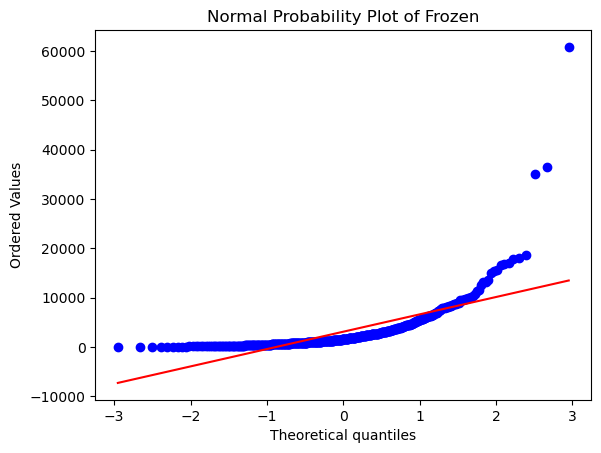

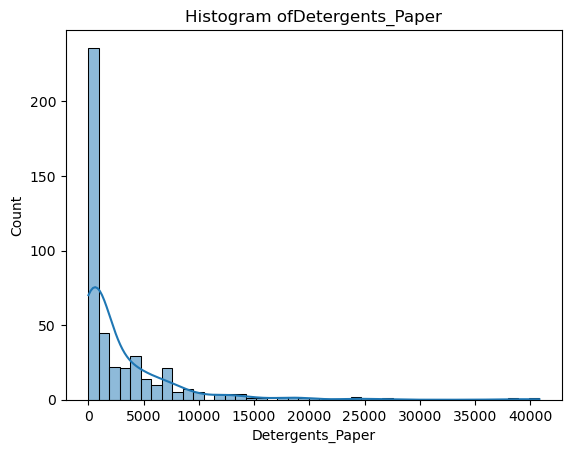

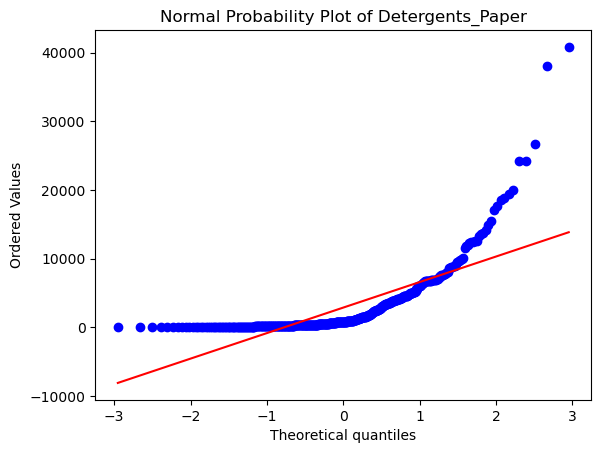

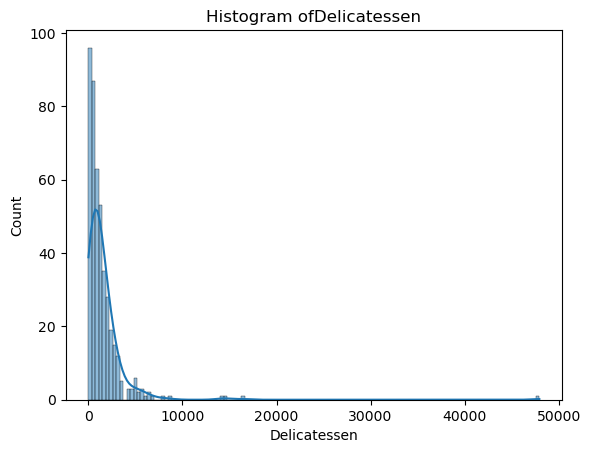

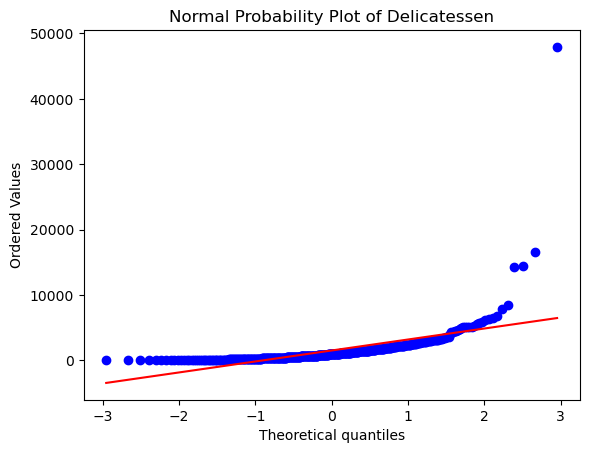

In [6]:
for col in wholesale_df.columns:
    sns.histplot(wholesale_df[col], kde=True)
    plt.title('Histogram of' + col)
    plt.show()
    stats.probplot(wholesale_df[col], plot=plt)
    plt.title('Normal Probability Plot of ' + col)
    plt.show()


5. What do you observe about distribution? (2 points)

All the attributes have outliers that needs to be removed as it affects the performance of the model. Thus the next step could be a solution for it.

6. Scale the sample data using the natural logarithm ( 1 point)

In [16]:
# Scale the data using the natural logarithm
wholesale_df2=np.log(wholesale_df)
wholesale_df2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


7. Check for Outliers using boxplot ( 2 points)

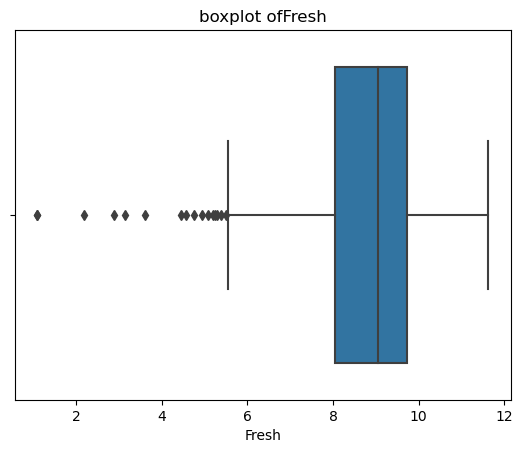

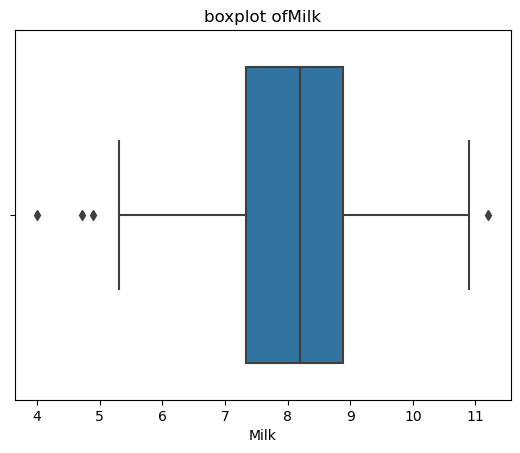

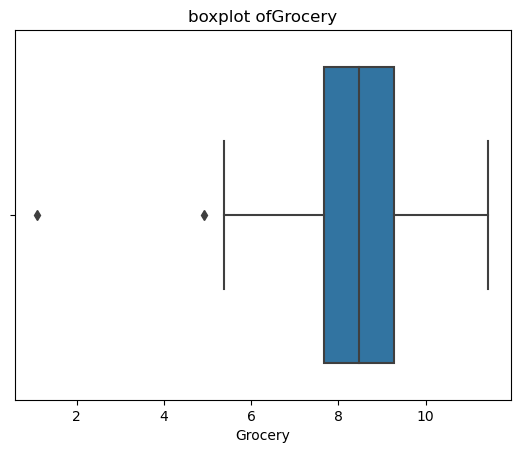

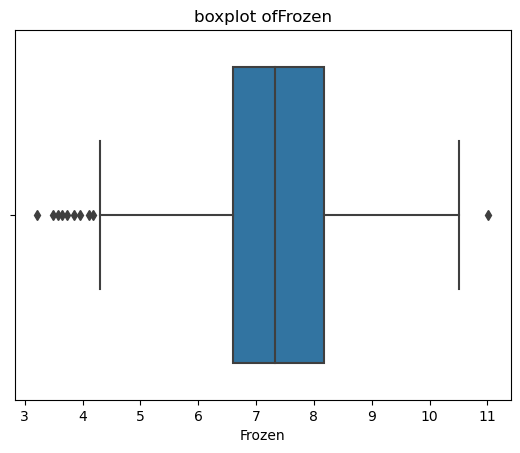

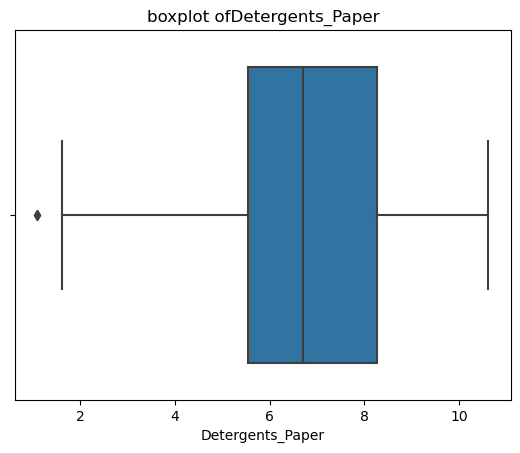

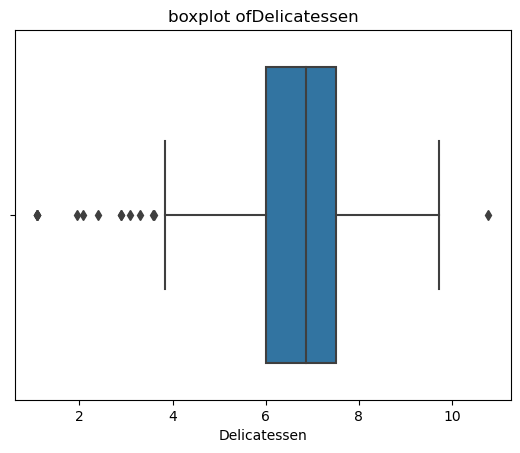

In [18]:
# write your code here
for col in wholesale_df2.columns:
    sns.boxplot(x=wholesale_df2[col])
    plt.title('boxplot of' + col)
    plt.show()

8. Apply natural log to transform long tails and plot the Log Sales Distribution using violinplot (2 points)

In [29]:
# write your code here
wholesale_df3=np.log(wholesale_df2)
wholesale_df3.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2.245688,2.216519,2.189501,1.680078,2.065765,1.973933
1,2.181747,2.218242,2.215521,2.011458,2.091809,2.012516
2,2.169817,2.206450,2.191307,2.052238,2.099866,2.193607
3,2.250542,1.958225,2.122001,2.170730,1.829137,2.013416
4,2.305218,2.151297,2.183977,2.112945,2.012591,2.146343


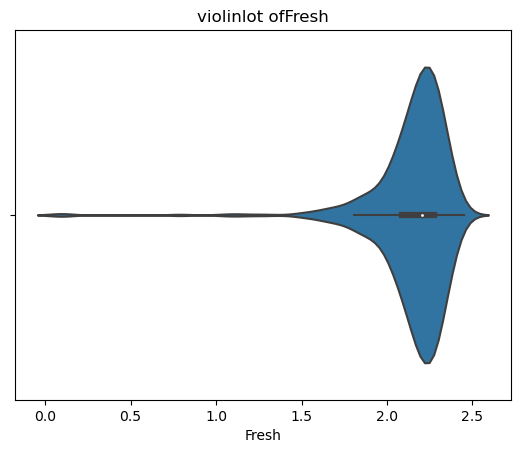

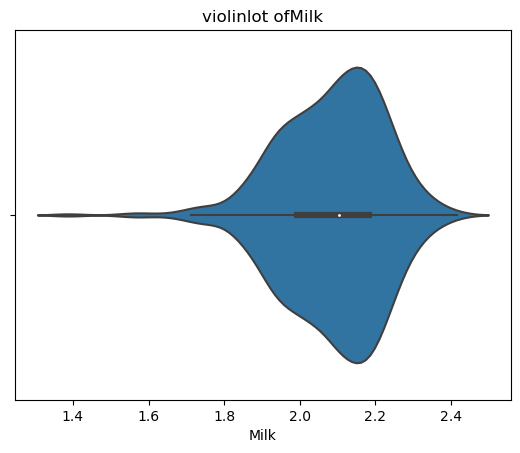

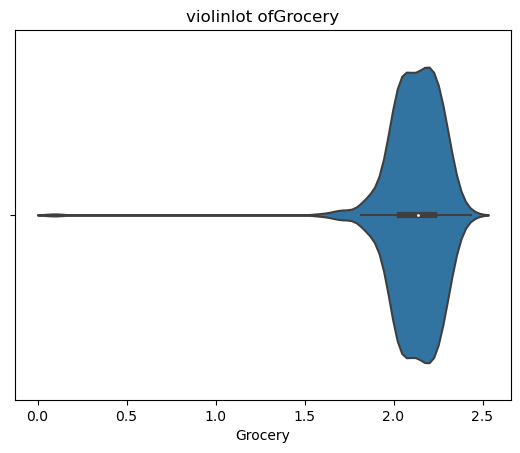

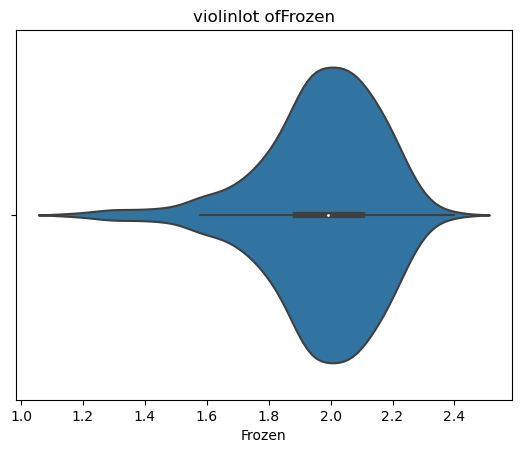

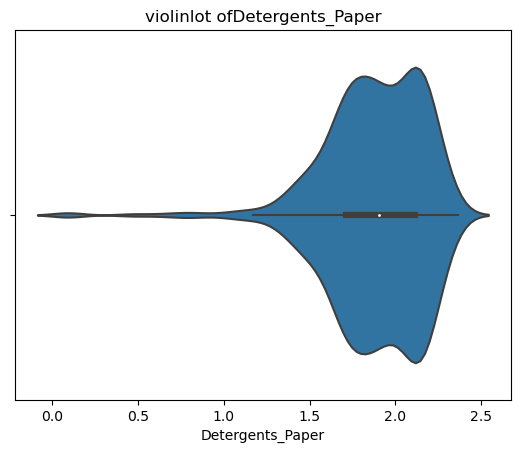

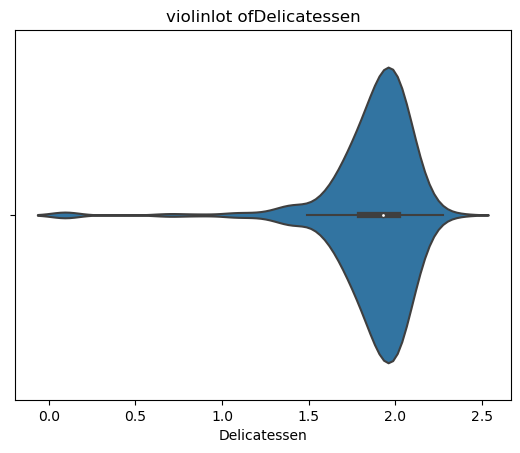

In [24]:
for col in wholesale_df3.columns:
    sns.violinplot(x=wholesale_df3[col])
    plt.title('violinlot of' + col)
    plt.show()

9. Remove Outliers using LocalOutlierFactor and plot the Log Sales Distribution using violinplot after removing the outliers. (2 points)

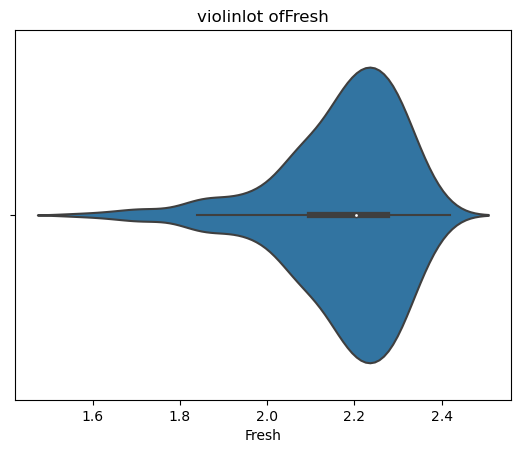

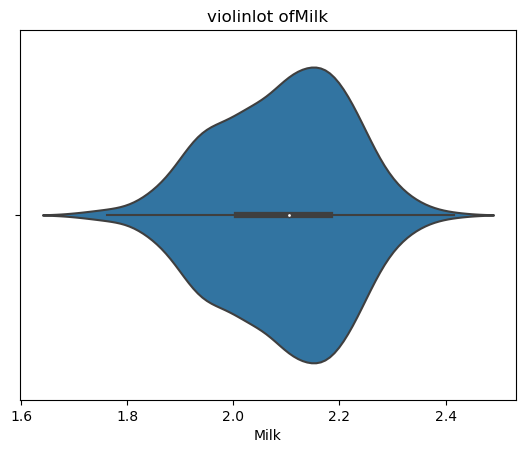

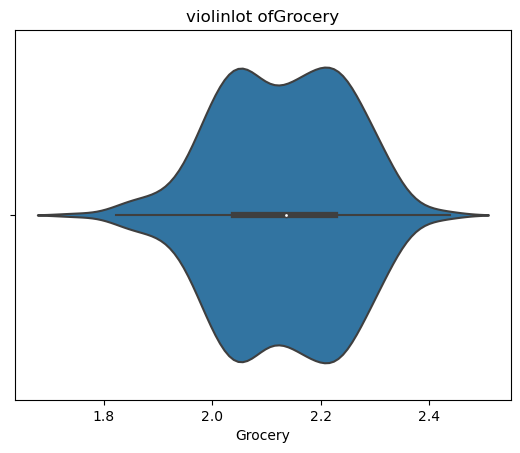

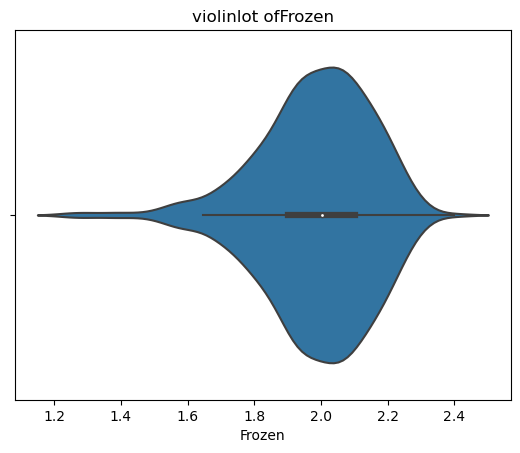

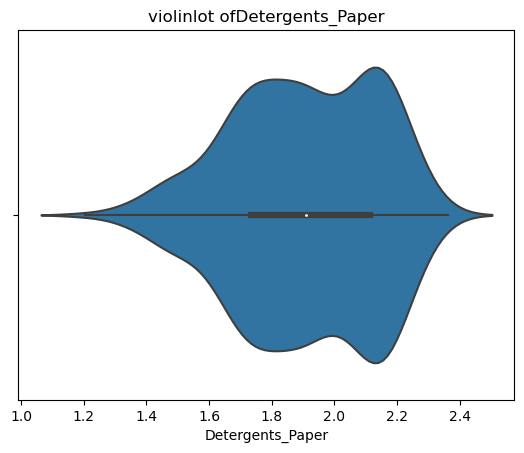

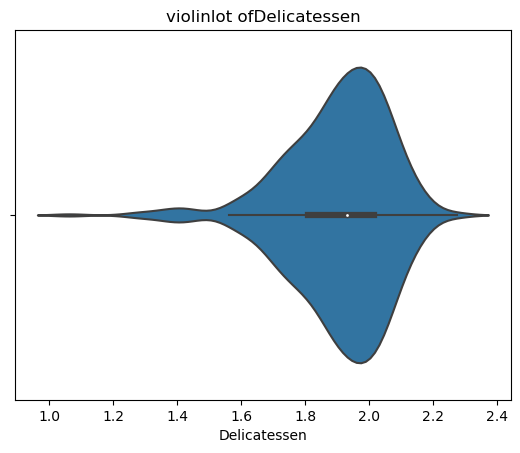

In [38]:
# write your code here
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
find_outliers = lof.fit_predict(wholesale_df3) == -1 
lof_df =wholesale_df3 [~find_outliers] 

for col in lof_df.columns:
    sns.violinplot(x=lof_df[col])
    plt.title('violinlot of' + col)
    plt.show()

10. use sns.pairplot to visualize Feature Distributions in your cleaned data (2 points)

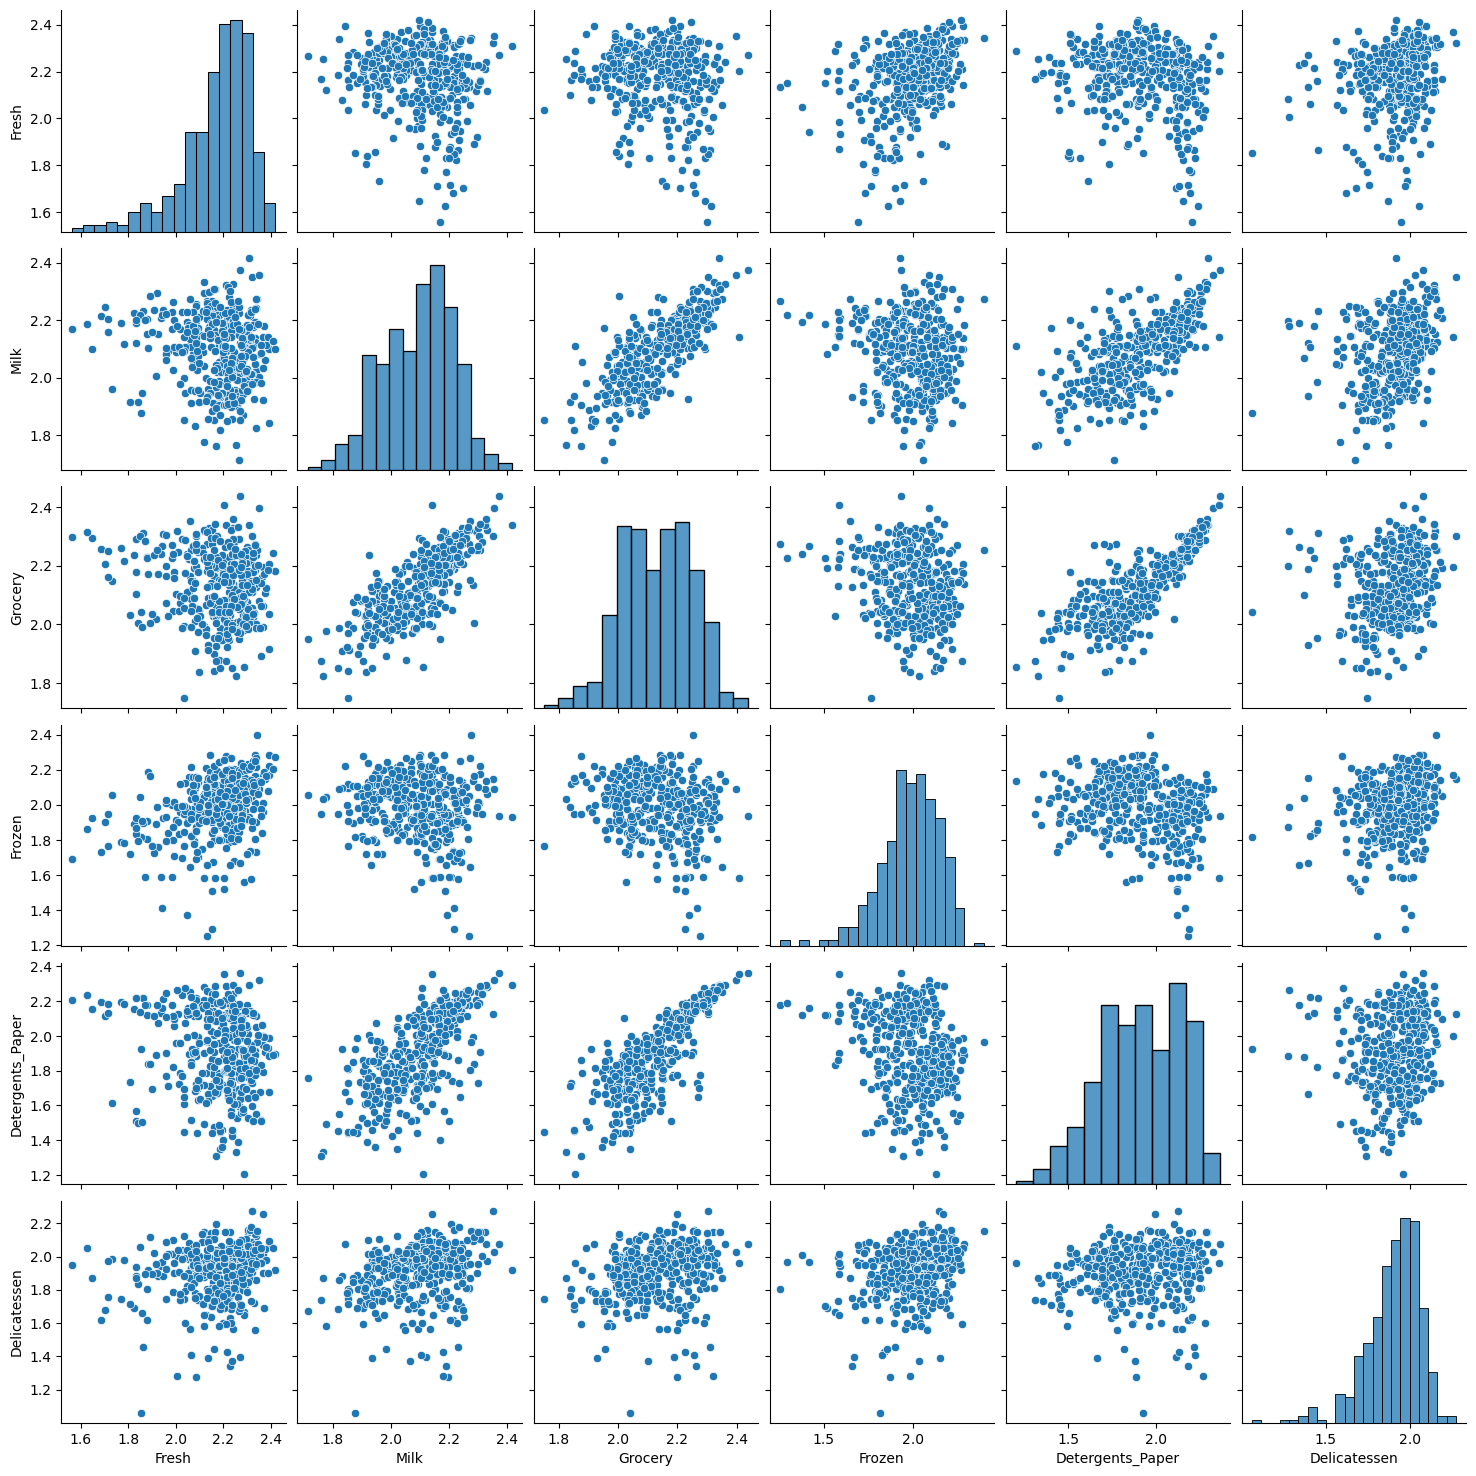

In [42]:
# write your code here

sns.pairplot(lof_df)


11. Check for Correlations using sns.clustermap (2 points)

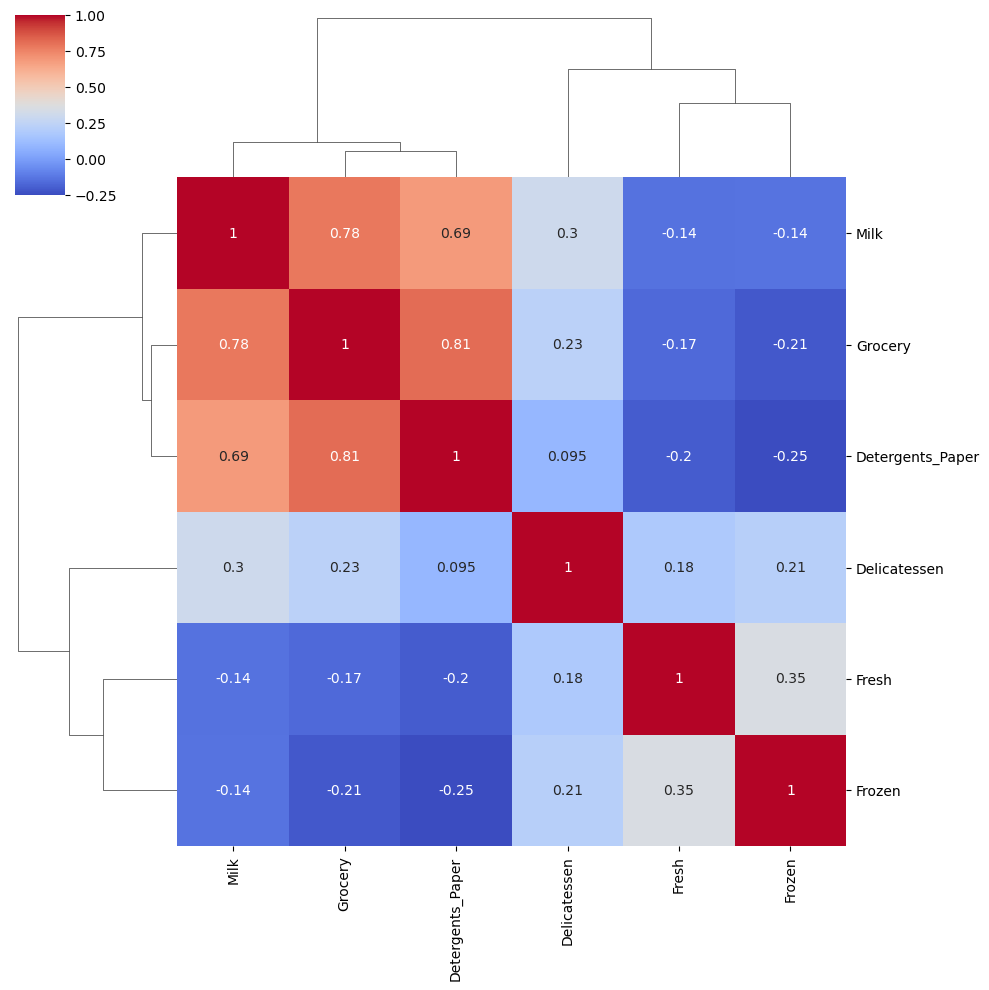

In [45]:
# write your code here
corr_matrix = lof_df.corr()

# Create a heatmap using sns.clustermap
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True)

12. What do you observe? (2 points)
Detergent and Grocery are positively correleated which shows multicollinearity ,thus one column should be dropped.It is done to reduce redundancy and to prevent the issue of multicollinearity in regression models.

### PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the cleaned data to discover which dimensions about the data best maximize the variance of features involved. 

In [46]:
no_comp = 6
pca = PCA(n_components=no_comp) 
principalComponents = pca.fit_transform(lof_df)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4','principal component 5','principal component 6'])
print (principal_df.shape)

(396, 6)


13. Biplot: Visualizing Product Relationships in 2D (2 points)

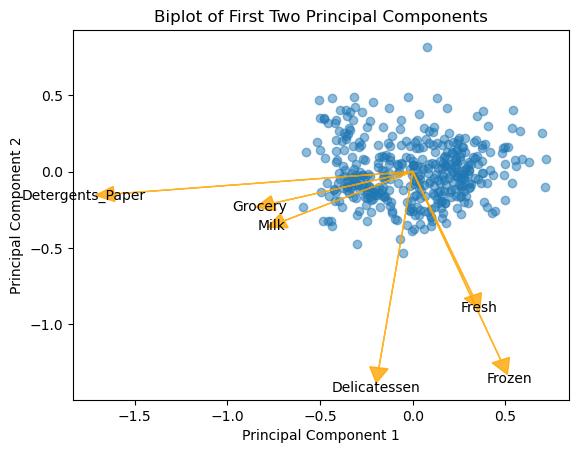

In [61]:
# write your code here
# Create scatter plot
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'], alpha=0.5)

# Add variable arrows
# Assumes standardized_data is a pandas dataframe with column names
# Adjust scaling factor to make arrows visible but not too long
for i, col in enumerate(lof_df.columns):
    plt.arrow(0, 0, pca.components_[0,i]*2, pca.components_[1,i]*2, 
              head_width=0.1, head_length=0.1, linewidth=1, color='orange', alpha=0.8)
    plt.text(pca.components_[0,i]*2.2, pca.components_[1,i]*2.2, col, color='black', ha='center', va='center')

# Set axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of First Two Principal Components')
plt.show()


14. Use sns.jointplot to plot x and y in the above code (2 points)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


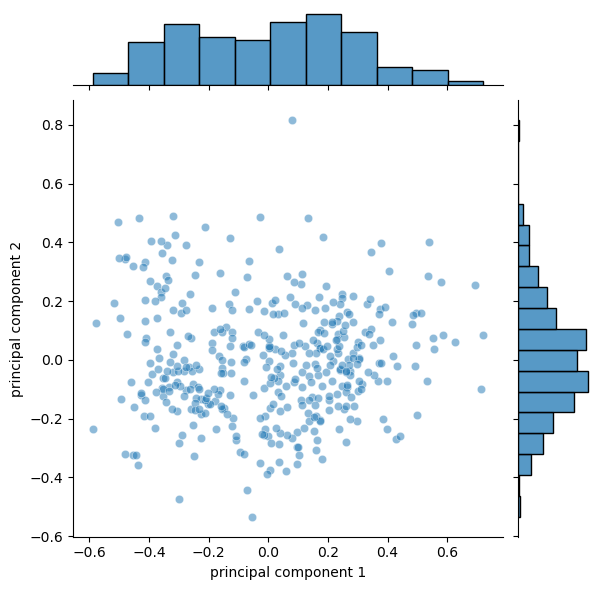

In [62]:
# write your code here
sns.jointplot(principal_df['principal component 1'], principal_df['principal component 2'], alpha=0.5)

15. Exploring the new Descriptors of the cleand Data using plot.bar (2 points)

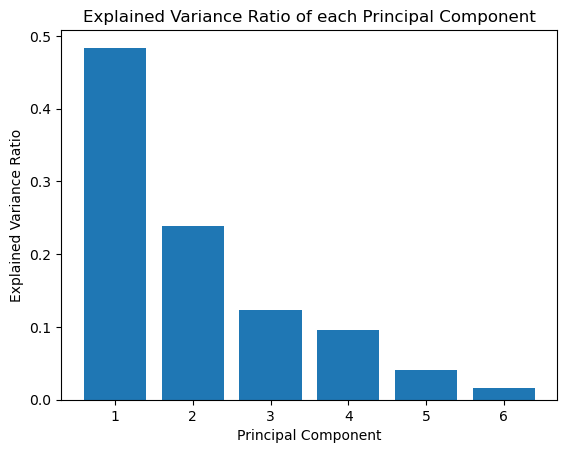

In [66]:
# write your code here
explained_variance_ratio = pca.explained_variance_ratio_

# plot the explained variance ratio using bar plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(explained_variance_ratio))+1, explained_variance_ratio)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained Variance Ratio of each Principal Component')
plt.show()

16. How much approximately the first and second features of explain of variance in total? (1 point)
The first 2 features explains upto 75 percent of the variance in total.

---
## All set

Please make sure you execute each cell before you submit your file; this is important because if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue. 

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_3 . 
---